In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.linear_model import LogisticRegression
print('Finsihed loading libs')

Finsihed loading libs


In [2]:
orig_x = np.load('X.npy')
orig_y = np.load('Y.npy')
print('finsihed reading data')

finsihed reading data


In [3]:
print(orig_x.shape)
print(orig_y.shape)
print(type(orig_y))
print("Finished reading input data")
orig_y = np.argmax(orig_y, axis = 1)
print(orig_y.shape)

(2062, 64, 64)
(2062, 10)
<class 'numpy.ndarray'>
Finished reading input data
(2062,)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(orig_x, orig_y, test_size=0.20, random_state=42)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1649, 64, 64)
(1649,)
(413, 64, 64)
(413,)


In [5]:
X_train = X_train.reshape(1649, 64*64)
X_test = X_test.reshape(413, 64*64)

In [6]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=200)
softmax_reg.fit(X_train, Y_train)

C:\Users\ihsan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [7]:
print( softmax_reg.score(X_test, Y_test) )
print( softmax_reg.score(X_train, Y_train) )

0.7506053268765133
1.0


In [8]:
from sklearn.metrics import accuracy_score
y_pred = softmax_reg.predict(X_test)
accVal = accuracy_score(Y_test, y_pred)
print(accVal)

0.7506053268765133


# TensorFlow

In [9]:
orig_X = np.load('X.npy')
orig_Y = np.load('Y.npy')

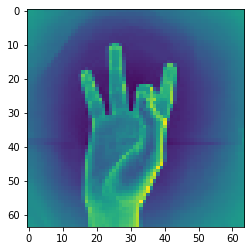

In [10]:
plt.imshow(orig_X[1751, :])

In [11]:
orig_Y= np.argmax(orig_Y, axis = 1)
print(orig_X.shape)
print(orig_Y.shape)

(2062, 64, 64)
(2062,)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(orig_X, orig_Y, test_size=0.2,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1649, 64, 64)
(1649,)
(413, 64, 64)
(413,)


In [13]:
model = keras.models.Sequential()
print("Initialized model")

Initialized model


In [14]:
model.add(keras.layers.Flatten(input_shape=[64, 64]))
print('Finsihed setting the input layer')

Finsihed setting the input layer


In [15]:
model.add(keras.layers.Dense( 64, activation='relu'))
print("Added hidden layer 1")

Added hidden layer 1


In [16]:
model.add(keras.layers.Dense(64, activation="relu"))
print('Added hidden layer 2')

Added hidden layer 2


In [17]:
model.add(keras.layers.Dense(10, activation='softmax'))
print("Added output layer")

Added output layer


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                262208    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 267,018
Trainable params: 267,018
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd", 
              metrics = ['accuracy'])
print("Finished compiling")

Finished compiling


In [20]:
print(x_train.shape)
print(y_train.shape)

(1649, 64, 64)
(1649,)


In [21]:
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
print("Finished categorizing the labels (output)")

Finished categorizing the labels (output)


In [22]:
print(y_train_categorical.shape)

(1649, 10)


In [23]:
history = model.fit(
  x_train,
  y_train_categorical,
  epochs=200,
  batch_size=32,
  verbose=True
)

Epoch 1/200
52/52 [==============================] - 0s 1ms/step - loss: 2.2767 - accuracy: 0.1431
Epoch 2/200
52/52 [==============================] - 0s 1ms/step - loss: 2.1870 - accuracy: 0.2577
Epoch 3/200
52/52 [==============================] - 0s 1ms/step - loss: 2.0807 - accuracy: 0.3178
Epoch 4/200
52/52 [==============================] - 0s 1ms/step - loss: 1.9285 - accuracy: 0.4269
Epoch 5/200
52/52 [==============================] - 0s 1ms/step - loss: 1.7886 - accuracy: 0.4585
Epoch 6/200
52/52 [==============================] - 0s 1ms/step - loss: 1.6514 - accuracy: 0.5100
Epoch 7/200
52/52 [==============================] - 0s 1ms/step - loss: 1.5175 - accuracy: 0.5488
Epoch 8/200
52/52 [==============================] - 0s 1ms/step - loss: 1.4138 - accuracy: 0.5652
Epoch 9/200
52/52 [==============================] - 0s 1ms/step - loss: 1.3389 - accuracy: 0.5743
Epoch 10/200
52/52 [==============================] - 0s 1ms/step - loss: 1.2327 - accuracy: 0.6089
Epoch 11/

52/52 [==============================] - 0s 1ms/step - loss: 0.2479 - accuracy: 0.9260
Epoch 83/200
52/52 [==============================] - 0s 1ms/step - loss: 0.2453 - accuracy: 0.9266
Epoch 84/200
52/52 [==============================] - 0s 1ms/step - loss: 0.2505 - accuracy: 0.9254
Epoch 85/200
52/52 [==============================] - 0s 1ms/step - loss: 0.2475 - accuracy: 0.9290
Epoch 86/200
52/52 [==============================] - 0s 1ms/step - loss: 0.2286 - accuracy: 0.9339
Epoch 87/200
52/52 [==============================] - 0s 1ms/step - loss: 0.2362 - accuracy: 0.9315
Epoch 88/200
52/52 [==============================] - 0s 1ms/step - loss: 0.2426 - accuracy: 0.9212
Epoch 89/200
52/52 [==============================] - 0s 1ms/step - loss: 0.2313 - accuracy: 0.9333
Epoch 90/200
52/52 [==============================] - 0s 1ms/step - loss: 0.2487 - accuracy: 0.9242
Epoch 91/200
52/52 [==============================] - 0s 1ms/step - loss: 0.2234 - accuracy: 0.9345
Epoch 92/200


52/52 [==============================] - 0s 1ms/step - loss: 0.0631 - accuracy: 0.9909
Epoch 164/200
52/52 [==============================] - 0s 1ms/step - loss: 0.1467 - accuracy: 0.9624
Epoch 165/200
52/52 [==============================] - 0s 1ms/step - loss: 0.0533 - accuracy: 0.9945
Epoch 166/200
52/52 [==============================] - 0s 1ms/step - loss: 0.0515 - accuracy: 0.9939
Epoch 167/200
52/52 [==============================] - 0s 1ms/step - loss: 0.0520 - accuracy: 0.9945
Epoch 168/200
52/52 [==============================] - 0s 1ms/step - loss: 0.0464 - accuracy: 0.9958
Epoch 169/200
52/52 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9921
Epoch 170/200
52/52 [==============================] - 0s 1ms/step - loss: 0.0466 - accuracy: 0.9958
Epoch 171/200
52/52 [==============================] - 0s 1ms/step - loss: 0.0487 - accuracy: 0.9927
Epoch 172/200
52/52 [==============================] - 0s 1ms/step - loss: 0.0443 - accuracy: 0.9958
Epoc

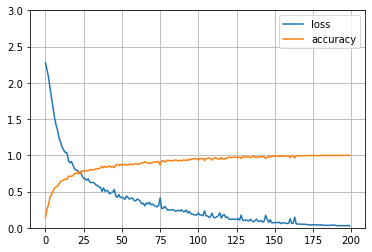

In [24]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 3) 
plt.show()

In [25]:
model.evaluate(
  x_test,
  to_categorical(y_test)
)

13/13 [==============================] - 0s 616us/step - loss: 0.7865 - accuracy: 0.8111


[0.7865468263626099, 0.8111380338668823]

In [26]:
predictions = model.predict(x_test[0:9])
print(predictions)

print(np.argmax(predictions, axis=1)) 

print("Check the truth")
print(y_test[0:9])

[[1.3912170e-12 9.9724966e-01 2.6980040e-03 5.1099018e-05 2.5575587e-14
  2.5071345e-14 3.7354795e-09 1.2106638e-06 3.9109999e-10 1.4254603e-10]
 [1.0000000e+00 2.2286559e-16 6.1875188e-12 1.1742229e-11 3.3046966e-08
  1.2559767e-10 7.6030133e-09 6.1360576e-11 1.0888025e-09 7.9056512e-14]
 [5.1393800e-10 4.4087869e-01 3.2947972e-02 1.2884935e-02 2.1008725e-06
  5.1154473e-07 5.9926679e-05 4.1112523e-03 4.6796590e-01 4.1148629e-02]
 [4.3658126e-04 9.2438171e-07 2.1493687e-08 2.8867268e-07 9.4480924e-02
  4.5044453e-05 4.8446629e-09 9.0487635e-01 1.5831593e-04 1.5131744e-06]
 [9.9999464e-01 1.4973238e-11 1.1403871e-10 2.8967228e-11 5.3025574e-06
  6.4769544e-11 1.9565947e-08 8.0424364e-08 4.3317433e-10 1.4634036e-14]
 [2.0690731e-10 3.5398392e-12 4.4884655e-14 4.8838860e-11 3.3714356e-09
  1.6201822e-10 8.4476514e-14 1.7857957e-08 9.9999976e-01 1.7939968e-07]
 [4.5451829e-01 4.9765345e-01 2.2660486e-06 8.6303335e-05 3.4920916e-02
  3.7618573e-03 2.6568875e-08 7.8705000e-03 5.2811974e-04 

In [27]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)

In [28]:
print(classification_report(y_test, y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        40
           1       0.84      0.82      0.83        44
           2       0.84      0.80      0.82        40
           3       0.88      0.86      0.87        42
           4       0.73      0.64      0.68        42
           5       0.87      0.93      0.90        44
           6       0.76      0.70      0.73        37
           7       0.72      0.81      0.76        42
           8       0.81      0.74      0.78        47
           9       0.78      0.89      0.83        35

    accuracy                           0.81       413
   macro avg       0.81      0.81      0.81       413
weighted avg       0.81      0.81      0.81       413

